In [1]:
##imports
import time
print(time.asctime())

import pandas as pd
import numpy as np
import csv
import codecs
import pickle
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

Fri Dec 21 12:30:11 2018


Preprocessing of input file, file formatting before reading to dataframe.

In [2]:
%%time

print(time.asctime())

import re

file = codecs.open("/home/fedora/programs/group3/Challenge_B/log.dat", "r", encoding='latin-1')
lines = file.readlines()
wfile = open("newlogfile.dat", "w")

for line in lines:
    line = "Date: " + line
    line = line.replace(',','')
    line = line.replace('[','')
    line = line.replace(']','')
    line = line.replace('. Sub1',',Sub1')
    line = line.replace('. Sub2',',Sub2')
    line = line.replace('. Sub3',',Sub3')
    line = line.replace('. Sub4',',Sub4')
    line = line.replace('. Status',',Status')
    line = line.replace('. System',',System')
    line = line.replace('. Info 1',',Info 1')
    line = line.replace('   Info 1',',Info 1')
    line = line.replace('  Info 1',',Info 1')
    line = line.replace('. Info 2',',Info 2')
    line = line.replace('   Info 2',',Info 2')
    line = line.replace('  Info 2',',Info 2')
    line = line.replace('. Info 3',',Info 3')
    line = line.replace('   Info 3',',Info 3')
    line = line.replace('  Info 3',',Info 3')
    line = line.replace(' ','')
    
    print(line)
    wfile.write(line)
wfile.close()
 

Fri Dec 21 12:30:12 2018
Date:June30201809:56:05,Sub1counter:0.580590003824,Status:Normal

Date:June30201809:56:05,Sub2counter:5.12518960404,Status:Normal

Date:June30201809:56:05,Sub3counter:1788.63831329,Status:Normal

Date:June30201809:56:05,Sub4counter:10.6688799994,Status:Normal

Date:June30201809:56:05,Systemstatus:Normal,Info1:None,Info2:kielellenikerkiävät,Info3:wrdZw53DmMKUw53DosOnwpTDjMORw5fDp8Oew4JBw5fDlsOqw5_DlcOcw4rDm8OVw4_CnHM=

Date:June30201810:56:05,Sub1counter:0.904953862551,Status:Normal

Date:June30201810:56:05,Sub2counter:6.91480141445,Status:Normal

Date:June30201810:56:05,Sub3counter:1155.23372254,Status:Normal

Date:June30201810:56:05,Sub4counter:6.68393779631,Status:Normal

Date:June30201810:56:05,Systemstatus:Normal,Info1:None,Info2:saakerasanelemahan,Info3:w5bDlsOqw6HDncOiwonDnsOVw5TDpsOSw6LDlsOWwo7Dm8Olw5bDn8Odw53DksKUfg==

Date:June30201811:56:05,Sub1counter:0.893381034308,Status:Normal

Date:June30201811:56:05,Sub2counter:2.77949884934,Status:Normal

Date:


Date:July21201800:56:05,Sub4counter:26.6844565226,Status:Dysfunctional

Date:July21201800:56:05,Systemstatus:Impaired,Info1:Joukahainen,Info2:yhtehenyhyttyämme,Info3:wrPDlsOnw6nDo8OYw5fCk8Otw4nDpMOOw5zDkMOPQcOkw53DrsOgw6HDlMKVfQ==

Date:July21201801:56:05,Sub1counter:0.54398190268,Status:Dysfunctional

Date:July21201801:56:05,Sub2counter:10.1668792266,Status:Normal

Date:July21201801:56:05,Sub3counter:1389.34114148,Status:Normal

Date:July21201801:56:05,Sub4counter:14.8978469729,Status:Normal

Date:July21201801:56:05,Systemstatus:Impaired,Info1:Joukahainen,Info2:puhe'etputoelevat,Info3:w5bDnsOaw5_DmcObw5XDmMOiw4rCkMOUw5nDncOMwopPw6tZw6fCoHk=

Date:July21201802:56:05,Sub1counter:0.156654695341,Status:Normal

Date:July21201802:56:05,Sub2counter:3.23829449568,Status:Normal

Date:July21201802:56:05,Sub3counter:1165.99780803,Status:Normal

Date:July21201802:56:05,Sub4counter:6.36765793562,Status:Normal

Date:July21201802:56:05,Systemstatus:Normal,Info1:None,Info2:saakerasanelemahan,Info3:w

Date:August08201807:56:05,Sub1counter:0.165775245381,Status:Normal

Date:August08201807:56:05,Sub2counter:5.27902712415,Status:Normal

Date:August08201807:56:05,Sub3counter:1086.77898659,Status:Normal

Date:August08201807:56:05,Sub4counter:5.00425966023,Status:Normal

Date:August08201807:56:05,Systemstatus:Normal,Info1:None,Info2:saammetoinentoisihimme,Info3:w5lZw57Dn8OgU8KJw6XDlcOWw5vDmMOdw5fDjcKCwovDp8OWw53Do8OYw5XDn8OVwo16

Date:August08201808:56:05,Sub1counter:0.739134968031,Status:Normal

Date:August08201808:56:05,Sub2counter:7.48826966892,Status:Normal

Date:August08201808:56:05,Sub3counter:1937.28215182,Status:Normal

Date:August08201808:56:05,Sub4counter:16.6565833155,Status:Normal

Date:August08201808:56:05,Systemstatus:Normal,Info1:None,Info2:kauniskasvinkumppalini,Info3:wrPDlsOnw6nDo8OYw5fCk8Otw4nDpMOOw5zDkMOPQcOkw53DrsOgw6HDlMKVfQ==

Date:August08201809:56:05,Sub1counter:0.678041822664,Status:Normal

Date:August08201809:56:05,Sub2counter:1.84106914775,Status:Normal

Date:Au

Making a dictionary with field labels as keys.

In [3]:
%%time

print(time.asctime())

SixG = {}
SixG_list = []
start = 0
end = 5
for iter in range (0,1000):
    rfile = codecs.open("newlogfile.dat", "r", encoding='latin-1')
    Nlines=rfile.readlines()[start:end]
    #print(Nlines)
    
    lc = 0
    for line in Nlines:
        line = line.replace("\r\n","")
        
        split = line.split(",")
        subsplit = split[0].split("Date:")
        subsplit[1] = subsplit[1].replace(":","")
        subsplit[1] = subsplit[1].replace("June","06")
        subsplit[1] = subsplit[1].replace("July","07")
        subsplit[1] = subsplit[1].replace("August","08")
        SixG["Date"] = subsplit[1]
    
        if (lc == 0):
            subsplit = split[1].split("Sub1counter:")
            SixG["Sub1counter"] = float(subsplit[1])
        
            subsplit = split[2].split("Status:")
            SixG["Sub1Status"] = subsplit[1]
        
        elif (lc == 1):
            subsplit = split[1].split("Sub2counter:")
            SixG["Sub2counter"] = float(subsplit[1])
        
            subsplit = split[2].split("Status:")
            SixG["Sub2Status"] = subsplit[1]
        
        elif (lc == 2):
            subsplit = split[1].split("Sub3counter:")
            SixG["Sub3counter"] = float(subsplit[1])
        
            subsplit = split[2].split("Status:")
            SixG["Sub3Status"] = subsplit[1]
        
        elif (lc == 3):
            subsplit = split[1].split("Sub4counter:")
            SixG["Sub4counter"] = float(subsplit[1])
        
            subsplit = split[2].split("Status:")
            SixG["Sub4Status"] = subsplit[1]
        
        elif (lc == 4):
            subsplit = split[1].split("Systemstatus:")
            SixG["Systemstatus"] = subsplit[1]
        
            subsplit = split[2].split("Info1:")
            SixG["Info1"] = subsplit[1]
        
            subsplit = split[3].split("Info2:")
            SixG["Info2"] = subsplit[1]
        
            subsplit = split[4].split("Info3:")
            SixG["Info3"] = subsplit[1]
            
        lc = lc + 1
           
    start = start + 5
    end = start + 5
    SixG_list.append(SixG)
    SixG = {}

print(SixG_list)
rfile.close()

Fri Dec 21 12:30:12 2018
[{'Date': '06302018095605', 'Sub1counter': 0.580590003824, 'Sub1Status': 'Normal', 'Sub2counter': 5.12518960404, 'Sub2Status': 'Normal', 'Sub3counter': 1788.63831329, 'Sub3Status': 'Normal', 'Sub4counter': 10.6688799994, 'Sub4Status': 'Normal', 'Systemstatus': 'Normal', 'Info1': 'None', 'Info2': 'kielellenikerkiÃ¤vÃ¤t', 'Info3': 'wrdZw53DmMKUw53DosOnwpTDjMORw5fDp8Oew4JBw5fDlsOqw5_DlcOcw4rDm8OVw4_CnHM='}, {'Date': '06302018105605', 'Sub1counter': 0.904953862551, 'Sub1Status': 'Normal', 'Sub2counter': 6.91480141445, 'Sub2Status': 'Normal', 'Sub3counter': 1155.23372254, 'Sub3Status': 'Normal', 'Sub4counter': 6.68393779631, 'Sub4Status': 'Normal', 'Systemstatus': 'Normal', 'Info1': 'None', 'Info2': 'saakerasanelemahan', 'Info3': 'w5bDlsOqw6HDncOiwonDnsOVw5TDpsOSw6LDlsOWwo7Dm8Olw5bDn8Odw53DksKUfg=='}, {'Date': '06302018115605', 'Sub1counter': 0.893381034308, 'Sub1Status': 'Normal', 'Sub2counter': 2.77949884934, 'Sub2Status': 'Normal', 'Sub3counter': 1860.30883761, '

Reading the dictionary list to pandas dataframe. Reorder the column labels. Saving the final dataframe to pickle.

In [4]:
%%time

print(time.asctime())

data = pd.DataFrame()
data = data.from_dict(SixG_list)
data = data[['Date', 'Sub1counter', 'Sub1Status', 'Sub2counter', 'Sub2Status', 'Sub3counter', 'Sub3Status',
                    'Sub4counter', 'Sub4Status', 'Systemstatus', 'Info1', 'Info2', 'Info3']]
print(data.columns)
print(data)

Fri Dec 21 12:30:13 2018
Index(['Date', 'Sub1counter', 'Sub1Status', 'Sub2counter', 'Sub2Status',
       'Sub3counter', 'Sub3Status', 'Sub4counter', 'Sub4Status',
       'Systemstatus', 'Info1', 'Info2', 'Info3'],
      dtype='object')
               Date  Sub1counter     Sub1Status  Sub2counter     Sub2Status  \
0    06302018095605     0.580590         Normal     5.125190         Normal   
1    06302018105605     0.904954         Normal     6.914801         Normal   
2    06302018115605     0.893381         Normal     2.779499         Normal   
3    06302018125605     0.967099         Normal     3.312610         Normal   
4    06302018135605     0.728419         Normal     2.115265         Normal   
5    06302018145605     0.591201         Normal     5.627967         Normal   
6    06302018155605     0.443565         Normal     5.967451         Normal   
7    06302018165605     0.779501         Normal     2.879147         Normal   
8    06302018175605     0.048131         Normal     1

Assigning numberical values for status fields.
Normal -> 0
Impaired -> 1
Dysfunctional -> 2

In [5]:
%%time

print(time.asctime())

sub1status = data['Sub1Status'].unique()
print(sub1status)
sub2status = data['Sub2Status'].unique()
print(sub2status)
sub3status = data['Sub3Status'].unique()
print(sub3status)
sub4status = data['Sub4Status'].unique()
print(sub4status)
Systemstatus = data['Systemstatus'].unique()
print(Systemstatus)
print(data.info())

data['Sub1Status'] = data['Sub1Status'].replace('Normal', 0)
data['Sub1Status'] = data['Sub1Status'].replace('Impaired', 1)
data['Sub1Status'] = data['Sub1Status'].replace('Dysfunctional', 2)

data['Sub2Status'] = data['Sub2Status'].replace('Normal', 0)
data['Sub2Status'] = data['Sub2Status'].replace('Impaired', 1)
data['Sub2Status'] = data['Sub2Status'].replace('Dysfunctional', 2)

data['Sub3Status'] = data['Sub3Status'].replace('Normal', 0)
data['Sub3Status'] = data['Sub3Status'].replace('Impaired', 1)
data['Sub3Status'] = data['Sub3Status'].replace('Dysfunctional', 2)

data['Sub4Status'] = data['Sub4Status'].replace('Normal', 0)
data['Sub4Status'] = data['Sub4Status'].replace('Impaired', 1)
data['Sub4Status'] = data['Sub4Status'].replace('Dysfunctional', 2)

data['Systemstatus'] = data['Systemstatus'].replace('Normal', 0)
data['Systemstatus'] = data['Systemstatus'].replace('Impaired', 1)
data['Systemstatus'] = data['Systemstatus'].replace('Dysfunctional', 2)

sub1status = data['Sub1Status'].unique()
print(sub1status)
sub2status = data['Sub2Status'].unique()
print(sub2status)
sub3status = data['Sub3Status'].unique()
print(sub3status)
sub4status = data['Sub4Status'].unique()
print(sub4status)
Systemstatus = data['Systemstatus'].unique()
print(Systemstatus)

print(data.info())
print(data.describe())
data.to_pickle("SixGpickle")

Fri Dec 21 12:30:14 2018
['Normal' 'Impaired' 'Dysfunctional']
['Normal' 'Impaired' 'Dysfunctional']
['Normal' 'Impaired' 'Dysfunctional']
['Normal' 'Impaired' 'Dysfunctional']
['Normal' 'Impaired' 'Dysfunctional']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Date            1000 non-null object
Sub1counter     1000 non-null float64
Sub1Status      1000 non-null object
Sub2counter     1000 non-null float64
Sub2Status      1000 non-null object
Sub3counter     1000 non-null float64
Sub3Status      1000 non-null object
Sub4counter     1000 non-null float64
Sub4Status      1000 non-null object
Systemstatus    1000 non-null object
Info1           1000 non-null object
Info2           1000 non-null object
Info3           1000 non-null object
dtypes: float64(4), object(9)
memory usage: 101.6+ KB
None
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13

Label encoding for the remaining categorical features

In [6]:
%%time

print(time.asctime())

Info1 = data['Info1'].unique()
print(len(Info1))
print(Info1)

Info2 = data['Info2'].unique()
print(len(Info2))
print(Info2)

Info3 = data['Info3'].unique()
print(len(Info3))
print(Info3)

lb_make = LabelEncoder()
data['Info1'] = lb_make.fit_transform(data['Info1'])
data['Info2'] = lb_make.fit_transform(data['Info2'])
data['Info3'] = lb_make.fit_transform(data['Info3'])

Info1 = data['Info1'].unique()
print(len(Info1))
print(Info1)

Info2 = data['Info2'].unique()
print(len(Info2))
print(Info2)

Info3 = data['Info3'].unique()
print(len(Info3))
print(Info3)

print(data.info())
print(data.describe())
data.to_pickle("SixGpickle")

Fri Dec 21 12:30:14 2018
4
['None' 'Joukahainen' 'JoukahainenLouhi' 'Louhi']
20
['kielellenikerkiÃ¤vÃ¤t' 'saakerasanelemahan' 'lajivirttÃ¤laulamahan'
 'hampahillenihajoovat' 'aivoniajattelevi' 'mieleniminuntekevi'
 'yhtehenyhyttyÃ¤mme' 'nÃ¤illÃ¤raukoillarajoilla' 'sukuvirttÃ¤suoltamahan'
 'poloisillapohjanmailla' "puhe'etputoelevat" 'lÃ¤henytkanssalaulamahan'
 'saammetoinentoisihimme' 'sanatsuussanisulavat' "saa'anisanelemahan"
 "kahta'altakÃ¤ytyÃ¤mme" 'velikultaveikkoseni' 'kauniskasvinkumppalini'
 'harvoinyhtehenyhymme' 'lÃ¤hteÃ¤nilaulamahan']
20
['wrdZw53DmMKUw53DosOnwpTDjMORw5fDp8Oew4JBw5fDlsOqw5_DlcOcw4rDm8OVw4_CnHM='
 'w5bDlsOqw6HDncOiwonDnsOVw5TDpsOSw6LDlsOWwo7Dm8Olw5bDn8Odw53DksKUfg=='
 'w5fDlsOfw5zDqsOYw5vDp8OoRcKQw5XDlcOgw43CgsOYw5bDncOUw6LCnXM='
 'w4HDmsOhw5zClMOaw57Dn8Oow4LCnMKJw6rDkMOKwozDlsOkw6jDmMOiw5jClX0='
 'wrjDnsOaw5_DmcOdw5LCk8Ohw4rDnsOew6LCi8OVwobDlsOaw6vDnMKgeQ=='
 'w5vDpMOhw6LDncOiw5LDn8Ogw4LCkMK5w6PDk8OLwoLDmcKVw6LDlMOdw5vDlcOUwqJr'
 'w5lZw57Dn8OgU8KJw6XDlcOWw5v

Saving the resultant dataframe to CSV file

In [7]:
data= pd.read_pickle("SixGpickle")
data.to_csv("SixG.csv")

Preparing mindata and target

In [8]:
%%time

print(time.asctime())

features_to_drop = []
mindata = data.drop(columns = features_to_drop,inplace= False)
Systemstatus = mindata["Systemstatus"]
mindata = mindata.drop(columns = "Systemstatus",inplace= False)
mindata.to_pickle("SixGMinpickle")
Systemstatus.to_pickle("Systemstatuspickle")

Fri Dec 21 12:30:14 2018
CPU times: user 3.1 ms, sys: 2.23 ms, total: 5.34 ms
Wall time: 4.2 ms


In [9]:
data

,Date,Sub1counter,Sub1Status,Sub2counter,Sub2Status,Sub3counter,Sub3Status,Sub4counter,Sub4Status,Systemstatus,Info1,Info2,Info3
0,06302018095605,0.580590,0,5.125190,0,1788.638313,0,10.668880,0,0,3,5,18
1,06302018105605,0.904954,0,6.914801,0,1155.233723,0,6.683938,0,0,3,14,8
2,06302018115605,0.893381,0,2.779499,0,1860.308838,0,15.843253,0,0,3,6,11
3,06302018125605,0.967099,0,3.312610,0,1763.334395,0,12.381909,0,0,3,1,0
4,06302018135605,0.728419,0,2.115265,0,1535.253497,0,17.266795,0,0,3,6,19
5,06302018145605,0.591201,0,5.627967,0,2431.536209,1,15.897143,0,0,3,0,19
6,06302018155605,0.443565,0,5.967451,0,2027.580131,1,17.154961,0,0,3,9,13
7,06302018165605,0.779501,0,2.879147,0,1061.898706,2,18.240880,0,1,0,19,12
8,06302018175605,0.048131,0,1.515949,0,1214.076757,0,8.443331,0,0,3,10,10
9,06302018185605,0.339473,0,1.466435,0,1965.625520,0,11.099432,0,0,3,17,14


In [10]:
data[data['Systemstatus'] == 2].index

Int64Index([81, 170, 575, 595, 631, 643, 664, 840, 896, 915, 998], dtype='int64')

In [11]:
%%time

print(time.asctime())
data = pd.read_pickle("SixGpickle")
X = pd.read_pickle("SixGMinpickle")
y = pd.read_pickle("Systemstatuspickle")
print("shape of SixGpickle data", data.shape)
print("columns of SixGpickle data", data.columns)
print("shape of SixGMinpickle data", X.shape)
print("columns of SixGMinpickle data", X.columns)
print("shape of Systemstatuspickle data", y.shape)

Fri Dec 21 12:30:14 2018
shape of SixGpickle data (1000, 13)
columns of SixGpickle data Index(['Date', 'Sub1counter', 'Sub1Status', 'Sub2counter', 'Sub2Status',
       'Sub3counter', 'Sub3Status', 'Sub4counter', 'Sub4Status',
       'Systemstatus', 'Info1', 'Info2', 'Info3'],
      dtype='object')
shape of SixGMinpickle data (1000, 12)
columns of SixGMinpickle data Index(['Date', 'Sub1counter', 'Sub1Status', 'Sub2counter', 'Sub2Status',
       'Sub3counter', 'Sub3Status', 'Sub4counter', 'Sub4Status', 'Info1',
       'Info2', 'Info3'],
      dtype='object')
shape of Systemstatuspickle data (1000,)
CPU times: user 3.18 ms, sys: 1.04 ms, total: 4.22 ms
Wall time: 3.53 ms


In [12]:
%%time

print(time.asctime())

Systemstatus = data["Systemstatus"]
ew_data = data.drop(columns = ['Systemstatus'], inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_0h = f1[2]
print("f1_score for all classes = {}".format(f1))
print("f1_score for dysfunctional class = {}".format(f1_dysfunctional_0h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)

Fri Dec 21 12:30:14 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=10, 

/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=False, class_weight=balanced, criterion=gini, max_depth=2, max_

/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  bootstrap=False, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=False, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=False, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, 

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, m

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    5.7s finished


f1_score for all classes = [1.         0.98305085 0.        ]
f1_score for dysfunctional class = 0.0
the confusion matrix is [[170   0   0]
 [  0  29   0]
 [  0   1   0]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 5.81 s, sys: 157 ms, total: 5.96 s
Wall time: 6.02 s


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
%%time

print(time.asctime())

print("shape of SixGMinpickle data", X.shape)
print("shape of Systemstatuspickle data", y.shape)
print("counts of Normal status in train target: {}".format(sum(y == 0)))
print("counts of Impaired status in train target: {}".format(sum(y == 1)))
print("counts of Dysfunctional status in train target: {}".format(sum(y == 2)))

## Apply random oversampling
ros = RandomOverSampler(sampling_strategy='minority', return_indices=True, ratio={0:857,1:386,2:257})
data, target, ids = ros.fit_sample(X, y)
data = pd.DataFrame(data)
data.columns = X.columns
data['Systemstatus'] = target

print("shape of training data after ROS", data.shape)
print("columns of training data after ROS", data.columns)
print("shape of target data after ROS", target.shape)
print("counts of Normal status in train target: {}".format(sum(target == 0)))
print("counts of Impaired status in train target: {}".format(sum(target == 1)))
print("counts of Dysfunctional status in train target: {}".format(sum(target == 2)))

target = pd.DataFrame(target)

Fri Dec 21 12:30:20 2018
shape of SixGMinpickle data (1000, 12)
shape of Systemstatuspickle data (1000,)
counts of Normal status in train target: 857
counts of Impaired status in train target: 132
counts of Dysfunctional status in train target: 11
shape of training data after ROS (1500, 13)
columns of training data after ROS Index(['Date', 'Sub1counter', 'Sub1Status', 'Sub2counter', 'Sub2Status',
       'Sub3counter', 'Sub3Status', 'Sub4counter', 'Sub4Status', 'Info1',
       'Info2', 'Info3', 'Systemstatus'],
      dtype='object')
shape of target data after ROS (1500,)
counts of Normal status in train target: 857
counts of Impaired status in train target: 386
counts of Dysfunctional status in train target: 257
CPU times: user 17.7 ms, sys: 2.06 ms, total: 19.8 ms
Wall time: 18 ms


In [14]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 0) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+0, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
ew_data = ew_data.drop(columns = ['Systemstatus'], inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_0h = f1[2]
print("f1_score for all classes = {}".format(f1))
print("f1_score for dysfunctional class = {}".format(f1_dysfunctional_0h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:30:20 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_de

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    6.4s finished


f1_score for all classes = [0.99713467 0.99280576 1.        ]
f1_score for dysfunctional class = 1.0
the confusion matrix is [[174   0   0]
 [  1  69   0]
 [  0   0  56]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 17.4 s, sys: 154 ms, total: 17.6 s
Wall time: 17.7 s


In [15]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 0) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+0, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)
## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_0h = f1[2]
print("f1_score for all classes = {}".format(f1))
print("f1_score for dysfunctional class = {}".format(f1_dysfunctional_0h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:30:38 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    6.4s finished


f1_score for all classes = [0.99713467 0.99280576 1.        ]
f1_score for dysfunctional class = 1.0
the confusion matrix is [[174   0   0]
 [  1  69   0]
 [  0   0  56]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 17.4 s, sys: 152 ms, total: 17.6 s
Wall time: 17.7 s


In [16]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 1) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+1, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_1h = f1[2]
print("f1_score for all classes after 1hr = {}".format(f1))
print("f1_score for dysfunctional class after 1hr = {}".format(f1_dysfunctional_1h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:30:55 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.3s finished


f1_score for all classes after 1hr = [0.83870968 0.70857143 0.93913043]
f1_score for dysfunctional class after 1hr = 0.9391304347826087
the confusion matrix is [[130  40   3]
 [  7  62   2]
 [  0   2  54]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19 s, sys: 179 ms, total: 19.2 s
Wall time: 19.3 s


In [17]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 2) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+2, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_2h = f1[2]
print("f1_score for all classes after 2hrs = {}".format(f1))
print("f1_score for dysfunctional class after 2hrs = {}".format(f1_dysfunctional_2h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:31:15 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_de

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.7s finished


f1_score for all classes after 2hrs = [0.8611898  0.70512821 0.96703297]
f1_score for dysfunctional class after 2hrs = 0.967032967032967
the confusion matrix is [[152  17   2]
 [ 29  55   0]
 [  1   0  44]]
RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.6 s, sys: 132 ms, total: 19.7 s
Wall time: 20 s


In [18]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 3) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+3, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_3h = f1[2]
print("f1_score for all classes after 3hrs = {}".format(f1))
print("f1_score for dysfunctional class after 3hrs = {}".format(f1_dysfunctional_3h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:31:35 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.6s finished


f1_score for all classes after 3hrs = [0.84795322 0.68322981 0.96907216]
f1_score for dysfunctional class after 3hrs = 0.9690721649484536
the confusion matrix is [[145  26   1]
 [ 24  55   0]
 [  1   1  47]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.3 s, sys: 137 ms, total: 19.4 s
Wall time: 19.6 s


In [19]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 4) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+4, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_4h = f1[2]
print("f1_score for all classes after 4hrs = {}".format(f1))
print("f1_score for dysfunctional class after 4hrs = {}".format(f1_dysfunctional_4h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:31:54 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.6s finished


f1_score for all classes after 4hrs = [0.85386819 0.66666667 0.98076923]
f1_score for dysfunctional class after 4hrs = 0.9807692307692307
the confusion matrix is [[149  28   1]
 [ 21  49   0]
 [  1   0  51]]
RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19 s, sys: 131 ms, total: 19.1 s
Wall time: 19.2 s


In [20]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 5) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+5, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_5h = f1[2]
print("f1_score for all classes after 5hrs = {}".format(f1))
print("f1_score for dysfunctional class after 5hrs = {}".format(f1_dysfunctional_5h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:32:14 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.7s finished


f1_score for all classes after 5hrs = [0.85302594 0.6835443  0.96774194]
f1_score for dysfunctional class after 5hrs = 0.967741935483871
the confusion matrix is [[148  25   1]
 [ 24  54   1]
 [  1   0  45]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.5 s, sys: 134 ms, total: 19.7 s
Wall time: 19.8 s


In [21]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 6) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+6, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_6h = f1[2]
print("f1_score for all classes after 6hrs = {}".format(f1))
print("f1_score for dysfunctional class after 6hrs = {}".format(f1_dysfunctional_6h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:32:33 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_de

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.8s finished


f1_score for all classes after 6hrs = [0.85386819 0.66216216 0.97029703]
f1_score for dysfunctional class after 6hrs = 0.9702970297029702
the confusion matrix is [[149  26   2]
 [ 23  49   0]
 [  0   1  49]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.6 s, sys: 135 ms, total: 19.7 s
Wall time: 19.9 s


In [22]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 7) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+7, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_7h = f1[2]
print("f1_score for all classes after 7hrs = {}".format(f1))
print("f1_score for dysfunctional class after 7hrs = {}".format(f1_dysfunctional_7h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:32:53 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.8s finished


f1_score for all classes after 7hrs = [0.85131195 0.67088608 0.94845361]
f1_score for dysfunctional class after 7hrs = 0.9484536082474228
the confusion matrix is [[146  24   2]
 [ 25  53   0]
 [  0   3  46]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.4 s, sys: 134 ms, total: 19.5 s
Wall time: 19.8 s


In [23]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 8) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+8, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_8h = f1[2]
print("f1_score for all classes after 8hrs = {}".format(f1))
print("f1_score for dysfunctional class after 8hrs = {}".format(f1_dysfunctional_8h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:33:13 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.6s finished


f1_score for all classes after 8hrs = [0.82634731 0.65432099 0.92156863]
f1_score for dysfunctional class after 8hrs = 0.9215686274509804
the confusion matrix is [[138  24   1]
 [ 29  53   2]
 [  4   1  47]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.3 s, sys: 134 ms, total: 19.5 s
Wall time: 19.6 s


In [24]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 9) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+9, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_9h = f1[2]
print("f1_score for all classes after 9hrs = {}".format(f1))
print("f1_score for dysfunctional class after 9hrs = {}".format(f1_dysfunctional_9h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:33:33 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.4s finished


f1_score for all classes after 9hrs = [0.81176471 0.62820513 0.90196078]
f1_score for dysfunctional class after 9hrs = 0.9019607843137256
the confusion matrix is [[138  26   3]
 [ 30  49   0]
 [  5   2  46]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 18.9 s, sys: 165 ms, total: 19 s
Wall time: 19.2 s


In [25]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 10) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+10, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_10h = f1[2]
print("f1_score for all classes after 10hrs = {}".format(f1))
print("f1_score for dysfunctional class after 10hrs = {}".format(f1_dysfunctional_10h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:33:52 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.5s finished


f1_score for all classes after 10hrs = [0.84831461 0.66225166 0.92134831]
f1_score for dysfunctional class after 10hrs = 0.9213483146067416
the confusion matrix is [[151  27   3]
 [ 22  50   0]
 [  2   2  41]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.1 s, sys: 147 ms, total: 19.2 s
Wall time: 19.4 s


In [26]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 11) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+11, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_11h = f1[2]
print("f1_score for all classes after 11hrs = {}".format(f1))
print("f1_score for dysfunctional class after 11hrs = {}".format(f1_dysfunctional_11h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:34:11 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.0s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_de

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.6s finished


f1_score for all classes after 11hrs = [0.86532951 0.7133758  0.91111111]
f1_score for dysfunctional class after 11hrs = 0.9111111111111111
the confusion matrix is [[151  22   1]
 [ 20  56   0]
 [  4   3  41]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19 s, sys: 157 ms, total: 19.2 s
Wall time: 19.4 s


In [27]:
%%time

print(time.asctime())

ew_data = pd.DataFrame(columns = data.columns)

for ind in range (0,len(data.index)):
    if (ind + 12) < len(data.index):
        ew_data.loc[data.index[ind]] = data.iloc[ind]
        ew_data.loc[ind, ['Systemstatus']] = data.loc[ind+12, ['Systemstatus']]

##print(ew_data)
Systemstatus = ew_data["Systemstatus"]
##ew_data = ew_data.drop(columns = ['Systemstatus', 'Sub1counter', 'Sub2counter', 'Sub3counter', 'Sub4counter', 'Info1', 'Info2', 'Info3'],inplace= False)
ew_data = ew_data.drop(columns = ['Systemstatus'],inplace= False)

## Splitting(random) into training and validation set
sets = train_test_split(ew_data, Systemstatus, test_size=0.20, random_state =0)
X_train = sets[0]
y_train = sets[2]
X_test  = sets[1]
y_test  = sets[3]


parameters = {'class_weight':['balanced'],
              'criterion':['gini','entropy'],
              'max_depth': [2,4,6,10,20,30,40],
              'n_estimators': [50],
              'max_features': ['auto'],
              'n_jobs': [-1],
              'bootstrap': [True, False]}

##f1_high = metrics.make_scorer(metrics.f1_score, pos_label = 1, average = "binary")
gscv = GridSearchCV(RandomForestClassifier(random_state=0), parameters, cv = 3, verbose=2, scoring = "f1_weighted")
gscv.fit(X_train, y_train)
clf = gscv.best_estimator_
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
f1 = metrics.f1_score(y_true=y_test, y_pred=predictions, average=None)
f1_dysfunctional_12h = f1[2]
print("f1_score for all classes after 12hrs = {}".format(f1))
print("f1_score for dysfunctional class after 12hrs = {}".format(f1_dysfunctional_12h))
print("the confusion matrix is", metrics.confusion_matrix(y_true=y_test, y_pred=predictions))
print(clf)


Fri Dec 21 12:34:31 2018
Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=auto, n_estima

[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=30, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, criterion=entropy, max_depth

[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=4, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1 
[CV]  bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=auto, n_estimators=50, n_jobs=-1, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    8.5s finished


f1_score for all classes after 12hrs = [0.86627907 0.70512821 0.91666667]
f1_score for dysfunctional class after 12hrs = 0.9166666666666666
the confusion matrix is [[149  25   3]
 [ 17  55   0]
 [  1   4  44]]
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
CPU times: user 19.1 s, sys: 179 ms, total: 19.3 s
Wall time: 19.5 s


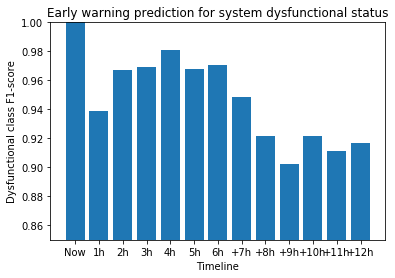

In [28]:
%matplotlib inline 
import matplotlib.pyplot as pl

# Plot histogram
x_data = ["Now", "1h", "2h", "3h", "4h", "5h", "6h", "+7h", "+8h", "+9h", "+10h", "+11h", "+12h"]
y_data = [f1_dysfunctional_0h, f1_dysfunctional_1h, f1_dysfunctional_2h, f1_dysfunctional_3h, f1_dysfunctional_4h, f1_dysfunctional_5h, 
          f1_dysfunctional_6h, f1_dysfunctional_7h, f1_dysfunctional_8h, f1_dysfunctional_9h, f1_dysfunctional_10h, f1_dysfunctional_11h, 
          f1_dysfunctional_12h]
pl.title("Early warning prediction for system dysfunctional status")
pl.xlabel("Timeline")
pl.ylabel("Dysfunctional class F1-score")
pl.bar(x_data, height= y_data)
pl.ylim(0.85, 1.00)
pl.show()